# Linear vs Poly

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [78]:
df = pd.read_csv('/Users/lardof/Machine Learning/Advertising.csv')

In [79]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# EDA

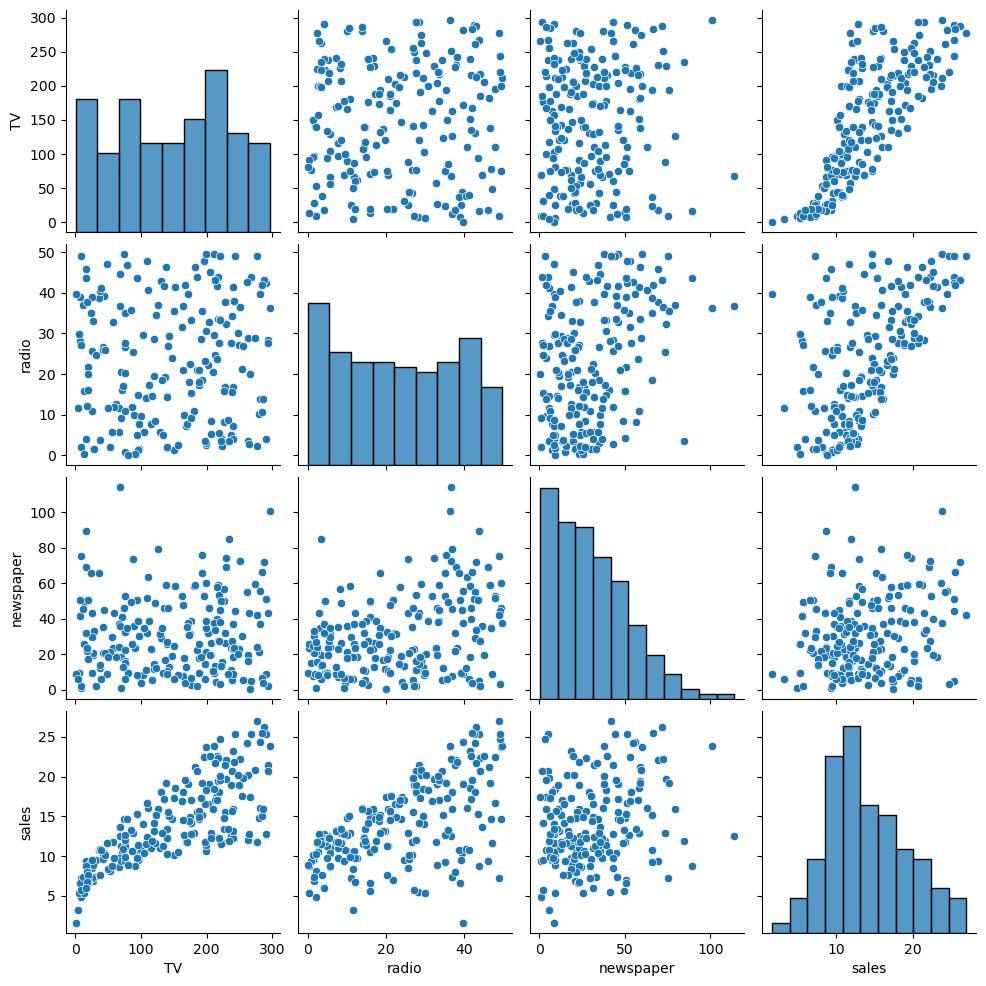

In [80]:
sns.pairplot(df)

In [81]:
#np.polyfit()

In [82]:
df.shape

(200, 4)

In [83]:
X = df['TV']
y = df['sales']

In [84]:
harcamalar = np.linspace(0,300,100)

# 1.derece

In [85]:
np.polyfit(X, y ,1)

array([0.04753664, 7.03259355])

In [86]:
satis = 0.04753664 * harcamalar + 7.03259355

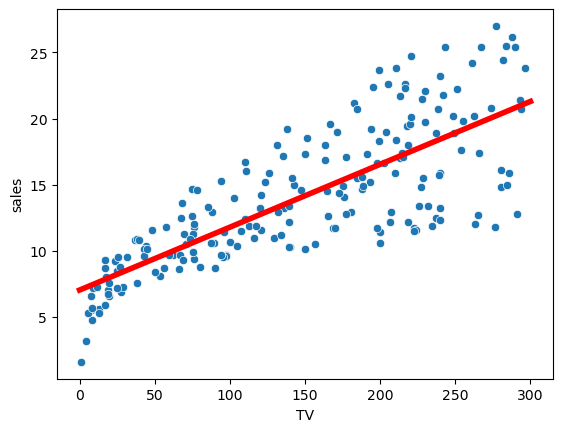

In [87]:
sns.scatterplot(data=df, x='TV', y='sales')
plt.plot(harcamalar, satis, c='red',lw=4);

# 2.derece

In [88]:
np.polyfit(X,y,2)
#   ax^2 + bx + c

array([-6.84693373e-05,  6.72659270e-02,  6.11412013e+00])

In [89]:
satis = -6.84693373e-05 * harcamalar**2 + 6.72659270e-02*harcamalar + 6.11412013e+00

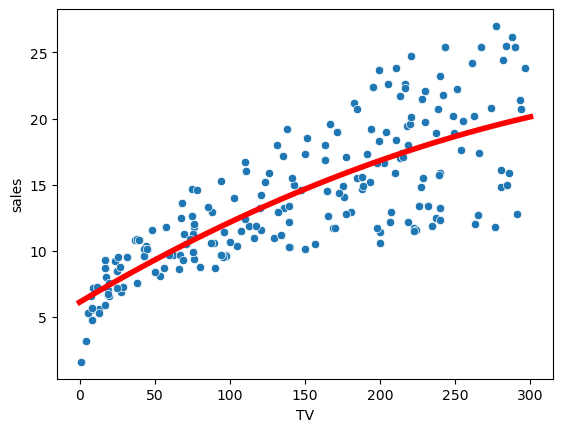

In [90]:
sns.scatterplot(data=df, x='TV', y='sales')
plt.plot(harcamalar, satis, c='red',lw=4);

# 3.derece

In [91]:
np.polyfit(X, y, 3)
#   ax^3 + bx^2 + cx + d

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

In [92]:
satis = 5.57199796e-07 * harcamalar**3 + -3.15222433e-04*harcamalar**2 + 9.64341770e-02*harcamalar +5.42010655e+0

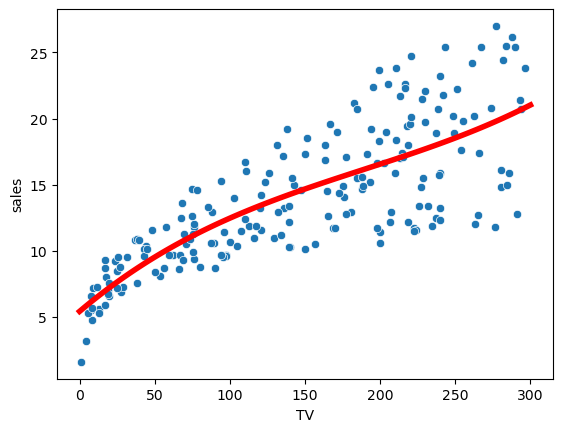

In [93]:
sns.scatterplot(data=df, x='TV', y='sales')
plt.plot(harcamalar, satis, c='red',lw=4);

In [94]:
x = df[['TV','radio','newspaper']]
y= df['sales']

In [95]:
np.polyfit(X,y,3)

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

# Train Test Split

In [96]:
X = df.drop('sales', axis=1)
y = df['sales']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# Linear Model

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model_linear = LinearRegression()

In [101]:
model_linear.fit(X_train, y_train)

LinearRegression()

In [102]:
pred_lin = model_linear.predict(X_test)

# Performans

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score

In [104]:
mae = mean_absolute_error(y_test, pred_lin)
rmse = np.sqrt(mean_squared_error(y_test,pred_lin))
r2 = r2_score(y_test, pred_lin)

In [105]:
print('MAE   :', mae)
print('RMSE  :', rmse)
print('R2    :', r2)


MAE   : 1.1843918802048918
RMSE  : 1.4355426289443445
R2    : 0.9197848691418977


In [106]:
res_lin = y_test - pred_lin

<Axes: xlabel='sales', ylabel='sales'>

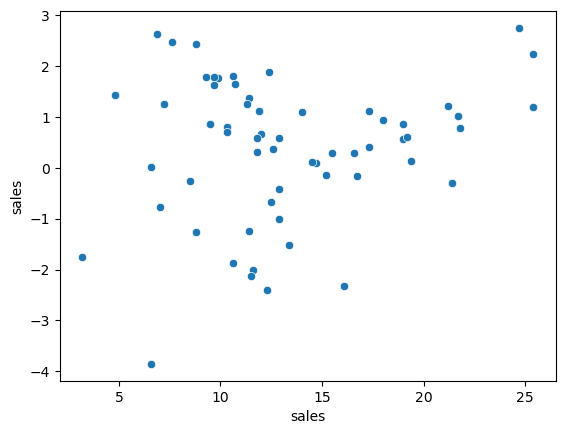

In [107]:
sns.scatterplot(x=y_test, y=res_lin)

<Axes: xlabel='sales', ylabel='Count'>

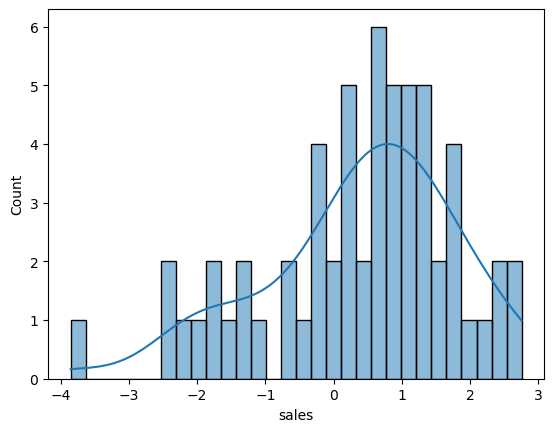

In [108]:
sns.histplot(res_lin, bins=30, kde=True)

# Final Lin Model

In [109]:
final_lin = LinearRegression()

In [110]:
final_lin.fit(X,y)

LinearRegression()

In [111]:
y_hat = final_lin.predict(X)

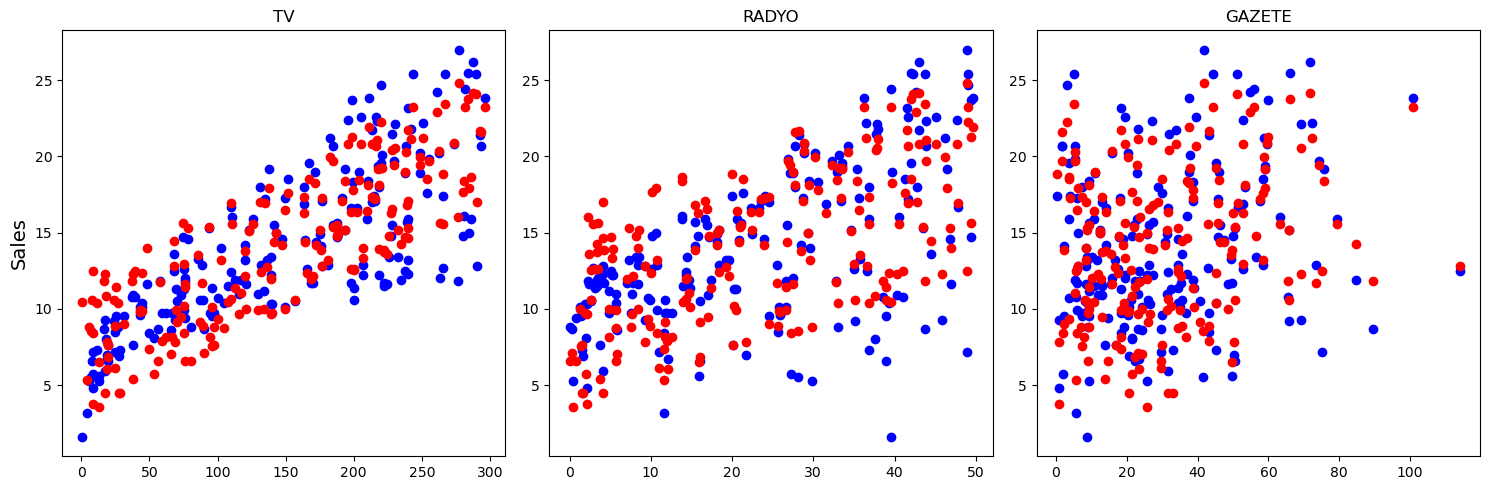

In [112]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df['TV'], df['sales'], 'o', color='blue')
ax[0].plot(df['TV'], y_hat, 'o', color='red')
ax[0].set_ylabel('Sales', size=14)
ax[0].set_title('TV')

ax[1].plot(df['radio'],df['sales'], 'o', color='blue')
ax[1].plot(df['radio'],y_hat, 'o', color='red')
ax[1].set_title('RADYO')

ax[2].plot(df['newspaper'],df['sales'], 'o', color='blue')
ax[2].plot(df['newspaper'],y_hat, 'o', color='red')
ax[2].set_title('GAZETE')

plt.tight_layout()

# Poly Model

In [113]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
poly_conv = PolynomialFeatures(degree = 2 , include_bias=False)

In [115]:
poly_feat = poly_conv.fit_transform(X)

In [116]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [117]:
poly_feat.shape

(200, 9)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

In [119]:
model_polinom = LinearRegression(fit_intercept=True)

In [120]:
model_polinom.fit(X_train, y_train)

LinearRegression()

In [121]:
pred_polinom = model_polinom.predict(X_test)

In [122]:
mae = mean_absolute_error(y_test, pred_polinom)
rmse = np.sqrt(mean_squared_error(y_test,pred_polinom))
r2 = r2_score(y_test, pred_polinom)
print('MAE   :', mae)
print('RMSE  :', rmse)
print('R2    :', r2)


MAE   : 0.4678054953838082
RMSE  : 0.6106500340084772
R2    : 0.9854852727113999


#  Best Regr Degree

In [123]:
train_rmse = []
test_rmse = []

for d in range(1, 10):
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_Rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_Rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse.append(train_Rmse)
    test_rmse.append(test_Rmse)


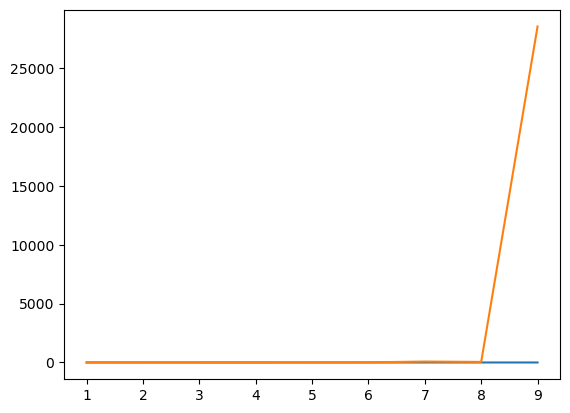

In [124]:
plt.plot(range(1,10), train_rmse[:9], label='Train')
plt.plot(range(1,10), test_rmse[:9], label='Test')

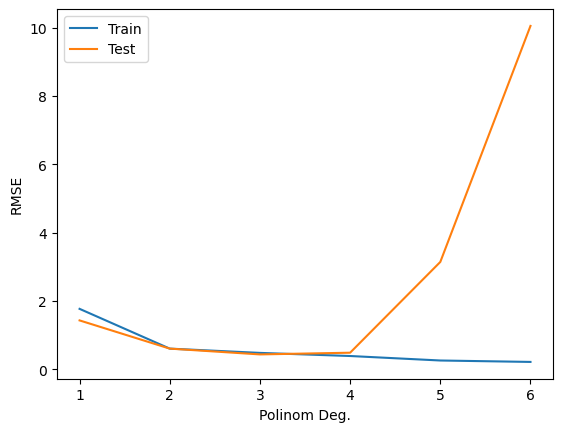

In [125]:
plt.plot(range(1,7), train_rmse[:6], label='Train')
plt.plot(range(1,7), test_rmse[:6], label='Test')
plt.xlabel('Polinom Deg.')
plt.ylabel('RMSE')
plt.legend();
#Testin trainden çıkıp kopmaya başladığı nokta bizim için ideal oktadır.Burda bu değer 4'tür.

# Görselleştirme.



In [126]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [127]:
poly_reg= PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
poly_regr_final = LinearRegression()
poly_regr_final.fit(X_poly,y)
#4.derece seçmemizin sebebi yukardakinde belirttiğim gibi overfittingi engellemek

LinearRegression()

In [128]:
poly_regr_pred = poly_regr_final.predict(X_poly)

In [129]:
mae = mean_absolute_error(y, poly_regr_pred)
rmse = np.sqrt(mean_squared_error(y, poly_regr_pred))
r2 = r2_score(y, poly_regr_pred)

print('MAE   :', mae)
print('RMSE  :', rmse)
print('R2    :', r2)

MAE   : 0.27404194089704176
RMSE  : 0.37778612706133735
R2    : 0.9947307203701946


In [130]:
df['sales'].mean(), df['sales'].std()

(14.0225, 5.217456565710477)

## Grafik Çizdirme

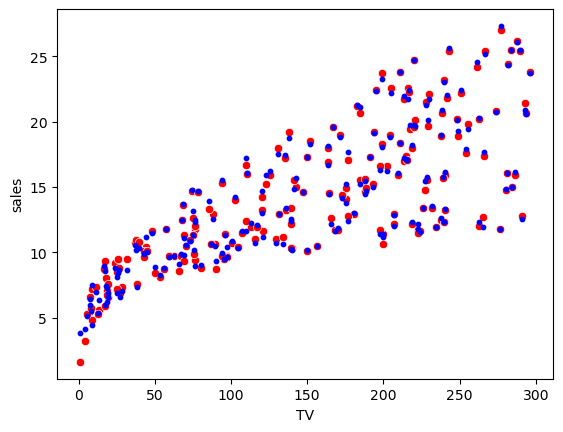

In [131]:
sns.scatterplot(x=X['TV'], y=y, color='red')
plt.scatter(X['TV'], poly_regr_pred, color='blue', s=10)

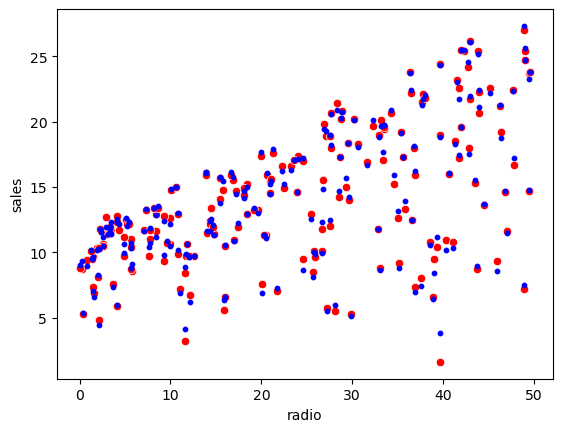

In [132]:
sns.scatterplot(x=X['radio'], y=y, color='red')
plt.scatter(X['radio'], poly_regr_pred, color='blue', s=10)

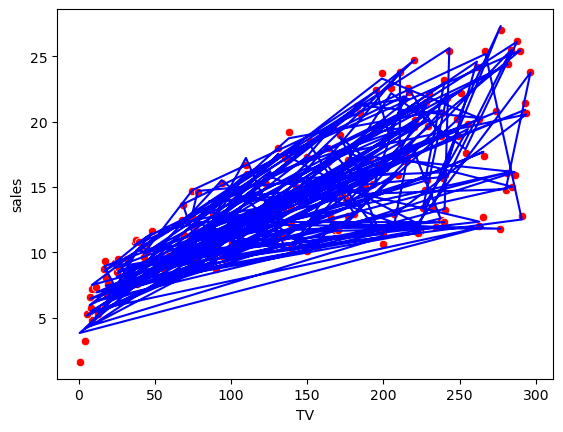

In [133]:
sns.scatterplot(x=X['TV'], y=y, color='red')
plt.plot(X['TV'], poly_regr_pred, color='blue')

## Regresyon Eğrisi Görselleştirme

In [134]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [135]:
X = df[['TV']]
y = df['sales']

In [147]:
poly_regr = PolynomialFeatures(degree=10)
X_poly = poly_regr.fit_transform(X)
poly_regr.fit(X_poly, y)

poly_regr_final = LinearRegression()
poly_regr_final.fit(X_poly, y)



LinearRegression()

In [148]:
poly_pred_10 = poly_regr_final.predict(X_poly)

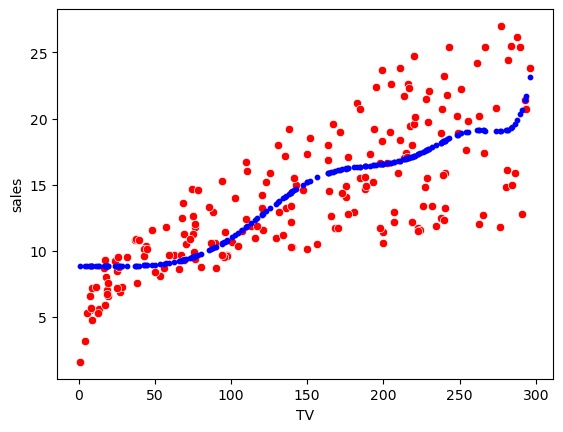

In [155]:
sns.scatterplot(x='TV', y=y,color='red',data=df)
plt.scatter(x['TV'], poly_pred_10, color='blue', s=10);


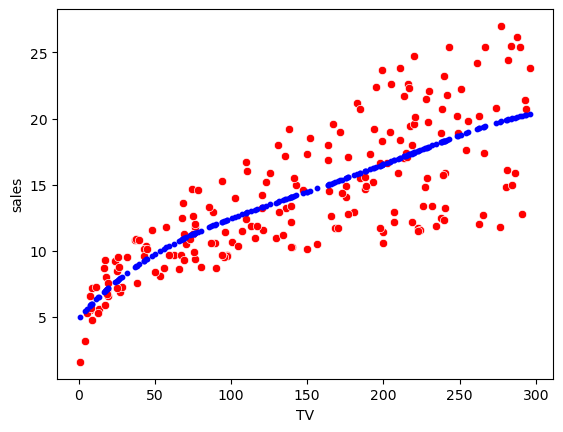

In [156]:
poly_regr = PolynomialFeatures(degree=4)
X_poly = poly_regr.fit_transform(X)
poly_regr.fit(X_poly, y)

poly_regr_final = LinearRegression()
poly_regr_final.fit(X_poly, y)

poly_pred_10 = poly_regr_final.predict(X_poly)

sns.scatterplot(x='TV', y=y,color='red',data=df)
plt.scatter(x['TV'], poly_pred_10, color='blue', s=10);